In [1]:
# подгружаю библиотеки
import pandas as pd
import matplotlib.pyplot as plt
url_movies = "movies.csv"
url_ratings = "ratings.csv"

# считываю дата фреймы из файлов
movies = pd.read_csv(url_movies)
ratings = pd.read_csv(url_ratings)

In [2]:
# так можно посмотреть на первые несколько строк,
# узнать, что там в целом лежит
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [3]:
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
5,1,110,4.0,1217896150
6,1,150,3.0,1217895940
7,1,161,4.0,1217897864
8,1,165,3.0,1217897135
9,1,204,0.5,1217895786


In [4]:
# составляю словарь, где ключами будут названия жанров,
# а значениями - количество фильмов, которые содержат в описании этот жанр
genres = dict()
for extension in movies["genres"]:
    for genre in extension.split('|'):
        if genre in genres:
            genres[genre] += 1
        else:
            genres[genre] = 1

# для удобства поменяю тип
genres = pd.Series(genres)
print(genres)

Adventure             1164
Animation              401
Children               540
Comedy                3515
Fantasy                670
Romance               1788
Drama                 5220
Action                1737
Crime                 1440
Thriller              2187
Horror                1001
Mystery                675
Sci-Fi                 860
IMAX                   152
War                    503
Musical                409
Documentary            415
Western                235
Film-Noir              195
(no genres listed)       7
dtype: int64


<IPython.core.display.Javascript object>


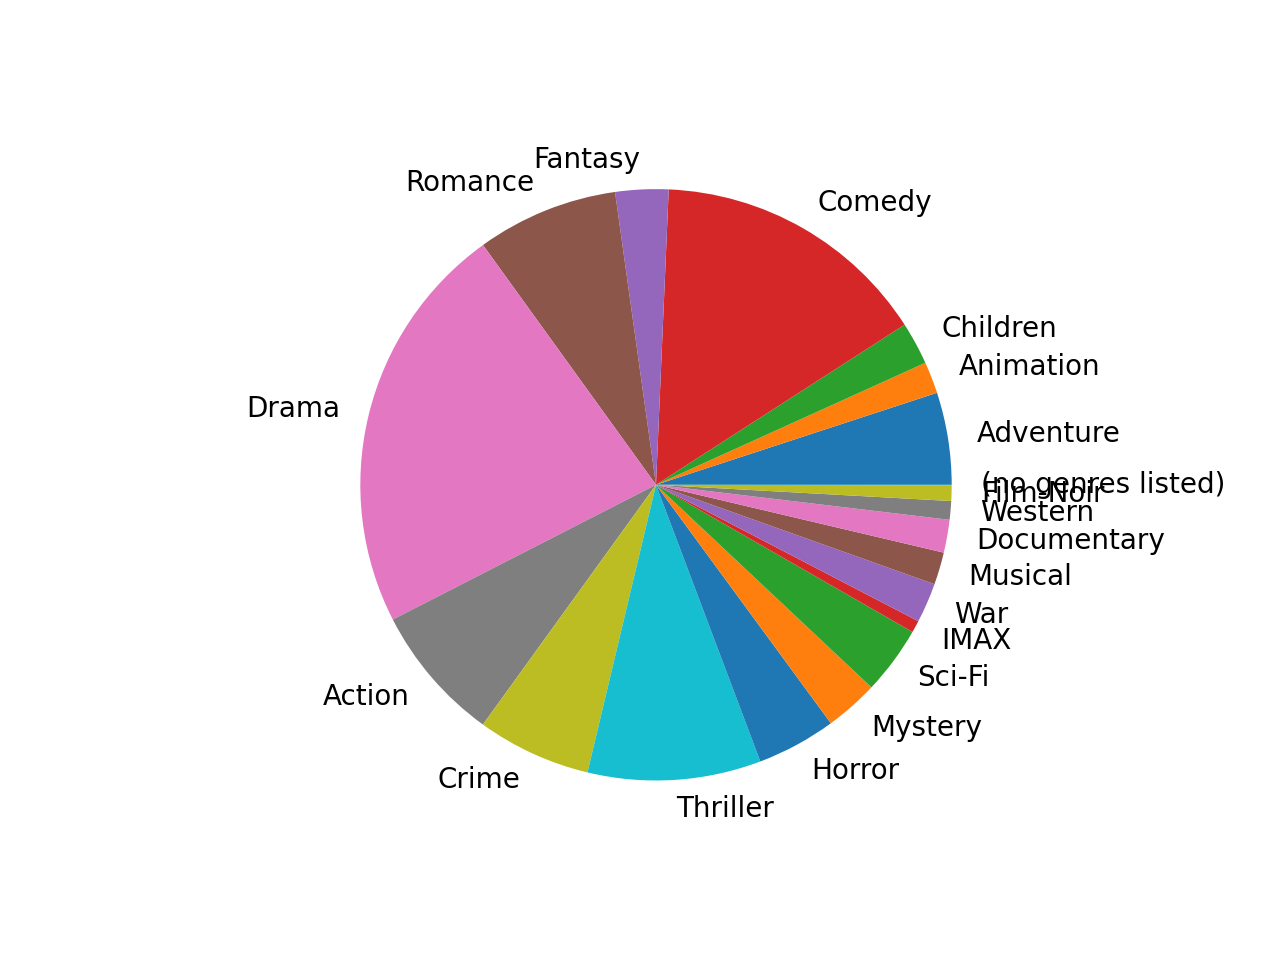

In [5]:
%matplotlib notebook

# на этом графике видно, какую часть от всех жанров занимает каждый конкретный
plt.pie(genres, labels = genres.index)
plt.show()

In [6]:
# IMAX не жанр, (no genres listed) тоже не жанр
print(movies[movies["genres"] == '(no genres listed)']["title"])

10172                   Li'l Quinquin (    )
10260                           Pablo (2012)
10280       The Big Broadcast of 1936 (1935)
10301            Round Trip to Heaven (1992)
10303            The 50 Year Argument (2014)
10317                        The Take (2009)
10328    Marco Polo: One Hundred Eyes (2015)
Name: title, dtype: object


<IPython.core.display.Javascript object>


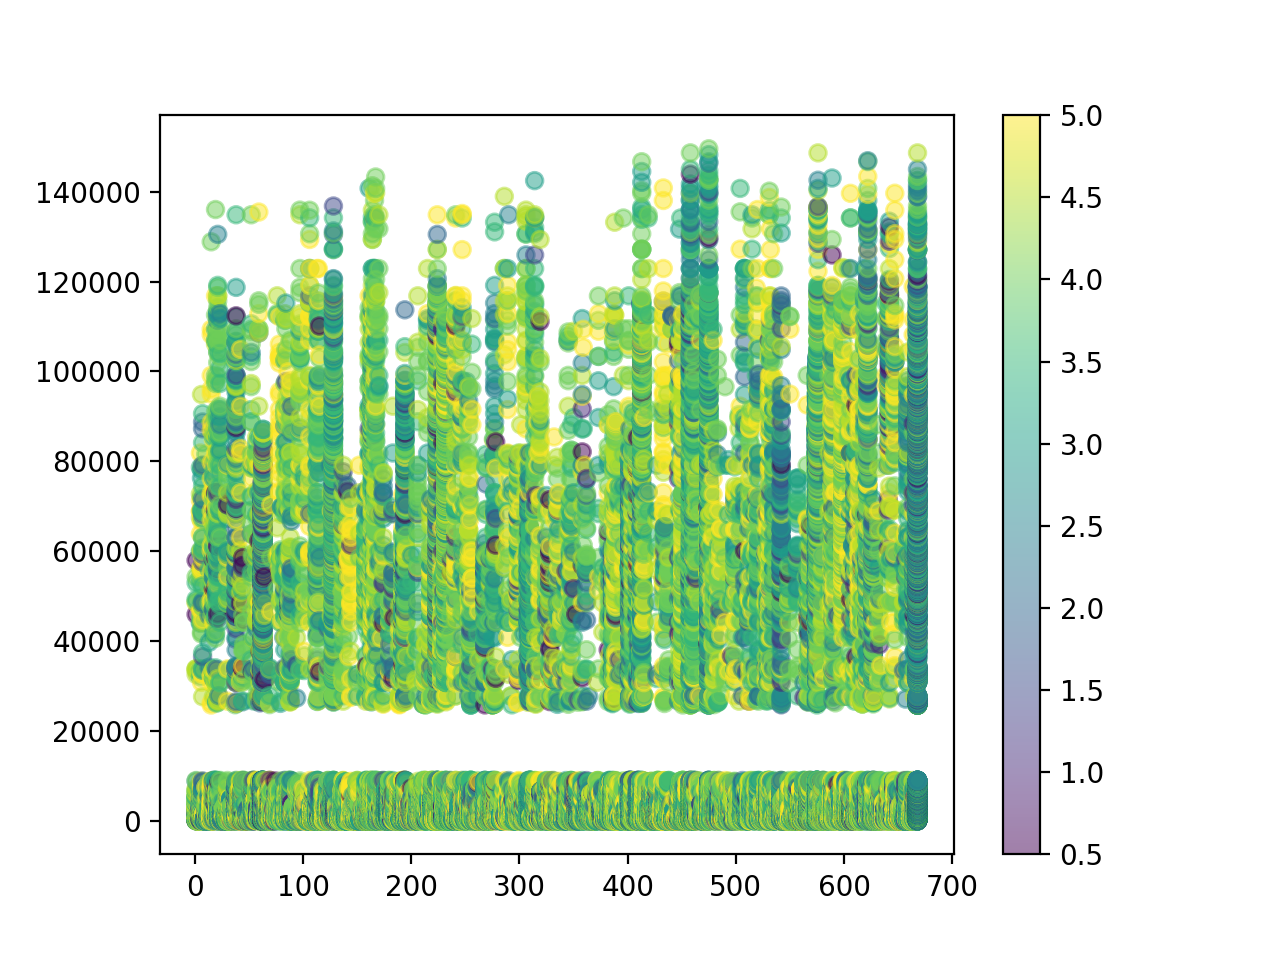

In [7]:
# на этом графике по оси х - разные критики, по оси у - разные фильмы,
# оттенок цвета показывает оценку, выставленную этим критиком
plt.scatter(x=ratings['userId'], y=ratings['movieId'], c = ratings['rating'], alpha = 0.5)
cbar = plt.colorbar()
plt.show()
# оказывается в базе нет фильмов с id 10000-25000,
# в остальном не особенно репрезентативный график,
# хотя увеличивать и смотреть интересно

In [8]:
print(movies[5906:5916])
# вот оно, странное место, не знаю, зачем тебе эта информация
# просто интересная особенность

      movieId                                        title  \
5906     9005                       Fire in the Sky (1993)   
5907     9008            Invisible Man Returns, The (1940)   
5908     9010  Love Me If You Dare (Jeux d'enfants) (2003)   
5909     9011                    Portrait of Jennie (1948)   
5910     9014                   Since You Went Away (1944)   
5911     9018                          Control Room (2004)   
5912    25736               Dr. Jekyll and Mr. Hyde (1920)   
5913    25746          Hunchback of Notre Dame, The (1923)   
5914    25748                   HE Who Gets Slapped (1924)   
5915    25750                          Sherlock Jr. (1924)   

                             genres  
5906           Drama|Mystery|Sci-Fi  
5907                  Horror|Sci-Fi  
5908                  Drama|Romance  
5909  Drama|Fantasy|Mystery|Romance  
5910                      Drama|War  
5911                Documentary|War  
5912            Drama|Horror|Sci-Fi  
5913         

In [9]:
# тут я склеиваю две таблицы, оставляя только две нужные колонки рейтинга и жанра (остальные удаляю)
ratings_genres = ratings.merge(movies, left_on='movieId', right_on='movieId')
ratings_genres = ratings_genres.drop(columns=['timestamp', 'title', 'movieId', 'userId'])
ratings_genres.head(10)

,rating,genres
0,4.0,Crime|Drama
1,4.0,Crime|Drama
2,1.5,Crime|Drama
3,4.0,Crime|Drama
4,3.0,Crime|Drama
5,4.0,Crime|Drama
6,4.0,Crime|Drama
7,4.0,Crime|Drama
8,4.5,Crime|Drama
9,3.5,Crime|Drama


In [10]:
# составляю словарь, где ключами будут названия жанров,
# а значениями - списки из всех оценок всех фильмов,
# в которых значатся эти жанры

# это самый долгий блок, упростил как мог
genres_ratings = {}
for genre in genres.keys():
    genres_ratings[genre] = []
for i, row in ratings_genres.iterrows():
    for genre in row['genres'].split('|'):
        genres_ratings[genre].append(row['rating'])
print(genres_ratings)
    

{'Adventure': [3.0, 4.0, 4.0, 4.0, 4.0, 5.0, 3.0, 4.0, 3.0, 3.5, 5.0, 3.0, 3.0, 3.0, 3.5, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 4.5, 4.0, 5.0, 4.5, 4.0, 5.0, 4.0, 5.0, 5.0, 5.0, 4.0, 5.0, 3.0, 4.0, 5.0, 3.0, 4.5, 3.0, 5.0, 4.0, 4.0, 5.0, 3.5, 5.0, 5.0, 3.5, 4.0, 3.0, 3.5, 3.5, 3.0, 4.0, 2.5, 3.0, 5.0, 4.0, 5.0, 2.5, 4.0, 3.0, 2.5, 4.0, 4.0, 4.0, 4.0, 3.5, 4.5, 2.0, 3.5, 5.0, 3.0, 3.5, 4.0, 4.0, 3.0, 4.0, 4.0, 5.0, 5.0, 4.0, 4.0, 5.0, 3.0, 5.0, 5.0, 3.5, 4.0, 3.0, 3.5, 5.0, 3.0, 3.0, 5.0, 5.0, 2.0, 4.0, 3.0, 3.0, 5.0, 4.0, 2.0, 4.0, 3.0, 4.5, 5.0, 3.0, 5.0, 3.0, 2.0, 4.0, 3.5, 5.0, 5.0, 3.0, 4.5, 3.5, 5.0, 5.0, 4.0, 4.0, 4.5, 4.0, 5.0, 4.0, 5.0, 4.0, 5.0, 4.5, 4.0, 5.0, 5.0, 5.0, 3.5, 4.0, 3.5, 4.0, 5.0, 4.0, 4.0, 5.0, 3.5, 3.0, 4.0, 2.0, 4.5, 4.0, 3.5, 4.0, 4.5, 3.0, 5.0, 4.0, 5.0, 4.0, 3.0, 3.5, 3.0, 3.5, 5.0, 3.0, 3.0, 4.0, 4.5, 5.0, 3.0, 5.0, 2.5, 3.5, 5.0, 2.0, 5.0, 4.5, 4.5, 5.0, 5.0, 4.0, 3.0, 5.0, 5.0, 3.0, 4.0, 5.0, 4.0, 5.0, 4.0, 5.0, 5.0, 4.0, 4.0, 3.5, 5.0, 5.0, 4.0, 4.0, 3.0, 3.0, 

In [11]:
# достаю из этого словаря ключи и значения по отдельности
keys = list(genres_ratings)
values = list(genres_ratings.values())

<IPython.core.display.Javascript object>


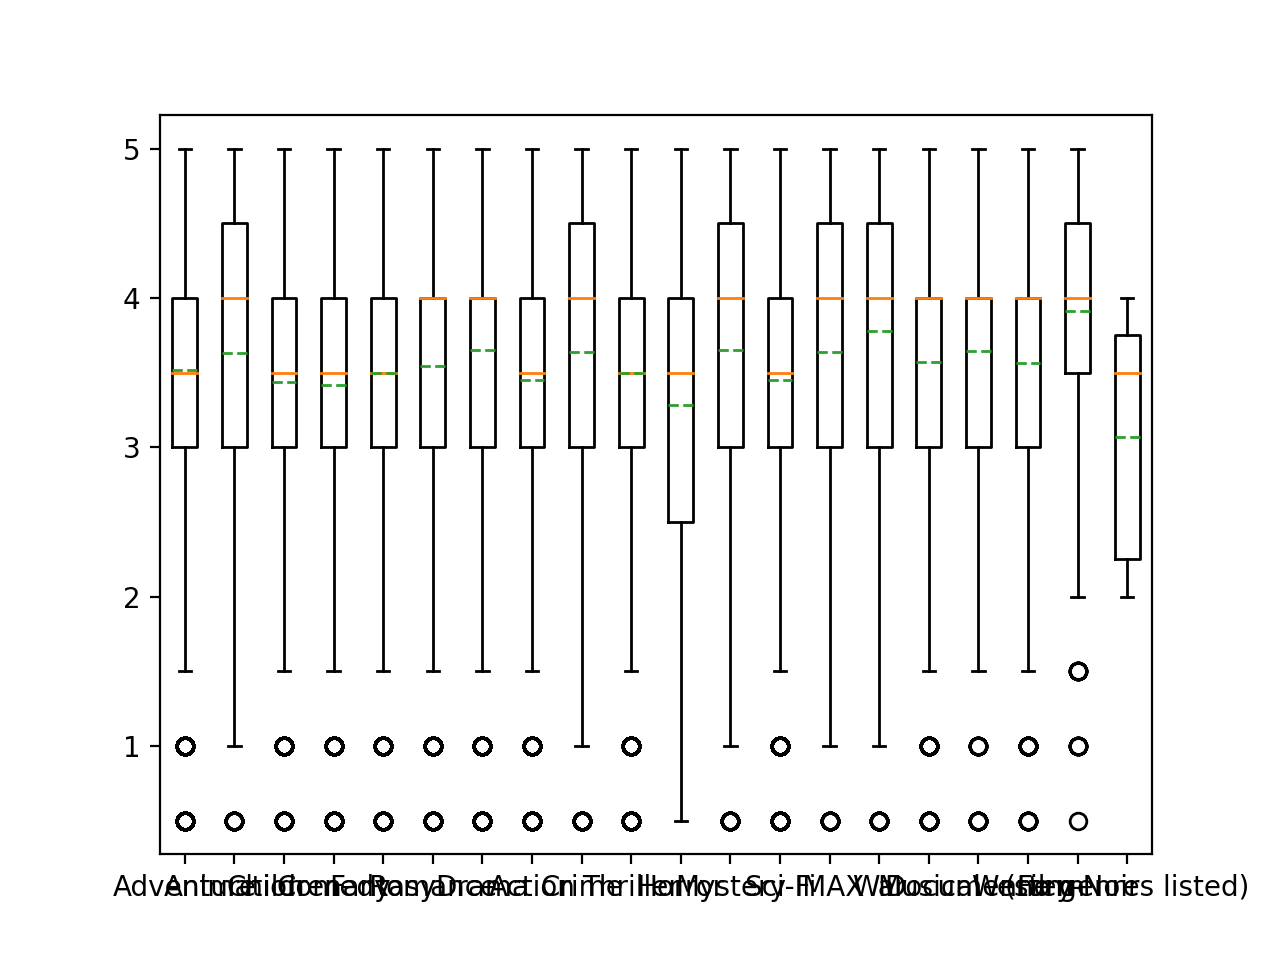

In [12]:
# я так и не запомнил правильное название этого графика,
# но мне очень зашло название "ящик с усами"
# оранжевая полоска - медианное значение, зеленая - среднее
# ящик сам показывает отклонение от медианы на +-25%
# то есть 50% всех оценок попадает в этот ящик,
# а кончики усов показывают 90% всех оценок
# по этому графику можно грубоватенько посмотреть на отклонения и кучность оценок,
# а также примерно узнать, какие жанры больше нравятся критикам
# кружочки внизу - большие отклонения (их еще называют выбросами)
# они настолько редкие, что можно их вообще не брать в расчет

box = plt.boxplot(values, showmeans = True, meanline = True, labels=keys)
plt.show()

In [1]:
# мой вывод состоит в том, что:
# самые высокие оценки у критиков получили жанры Анимация, Криминал, Мистика, Военное и Нуар
# из которых, на мой взгляд, лидирует Нуар, так как у него меньше оценок 0.5-2

# с другой же стороны, Нуаров меньше, у них узкая аудитория, возможно их смотрят только те критики,
# которым именно Нуары и нравятся

# еще интересное наблюдение, чем больше фильмов в жанре, тем больше расходятся мнения критиков
# зависимость нечеткая, но прослеживается

# а самые неоднозначные фильмы - хорроры!